In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(199, 31)
              Time          V1          V2          V3          V4  \
count   199.000000  199.000000  199.000000  199.000000  199.000000   
mean    810.145729   -0.195219    0.365362    0.723368    0.080189   
std     453.916218    1.366244    1.094738    1.012976    1.397452   
min      34.000000   -6.169664   -4.841034   -2.564546   -4.434211   
25%     434.000000   -0.960573   -0.248504    0.233417   -0.809951   
50%     795.000000   -0.321860    0.240101    0.707449    0.352728   
75%    1227.500000    1.143751    0.977514    1.320828    1.102101   
max    1521.000000    1.586093    6.118940    3.350717    3.194245   

               V5          V6          V7          V8          V9  ...  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  ...   
mean     0.065864    0.160179    0.036501   -0.096655    0.034302  ...   
std      1.031641    1.310109    0.799124    1.189370    1.024596  ...   
min     -2.216455   -3.047061   -4.417815  -12.258158   -2.7743

In [ ]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Numpy: 1.25.2
Pandas: 2.0.3
Matplotlib: 3.7.1
Seaborn: 0.13.1
Scipy: 1.11.4


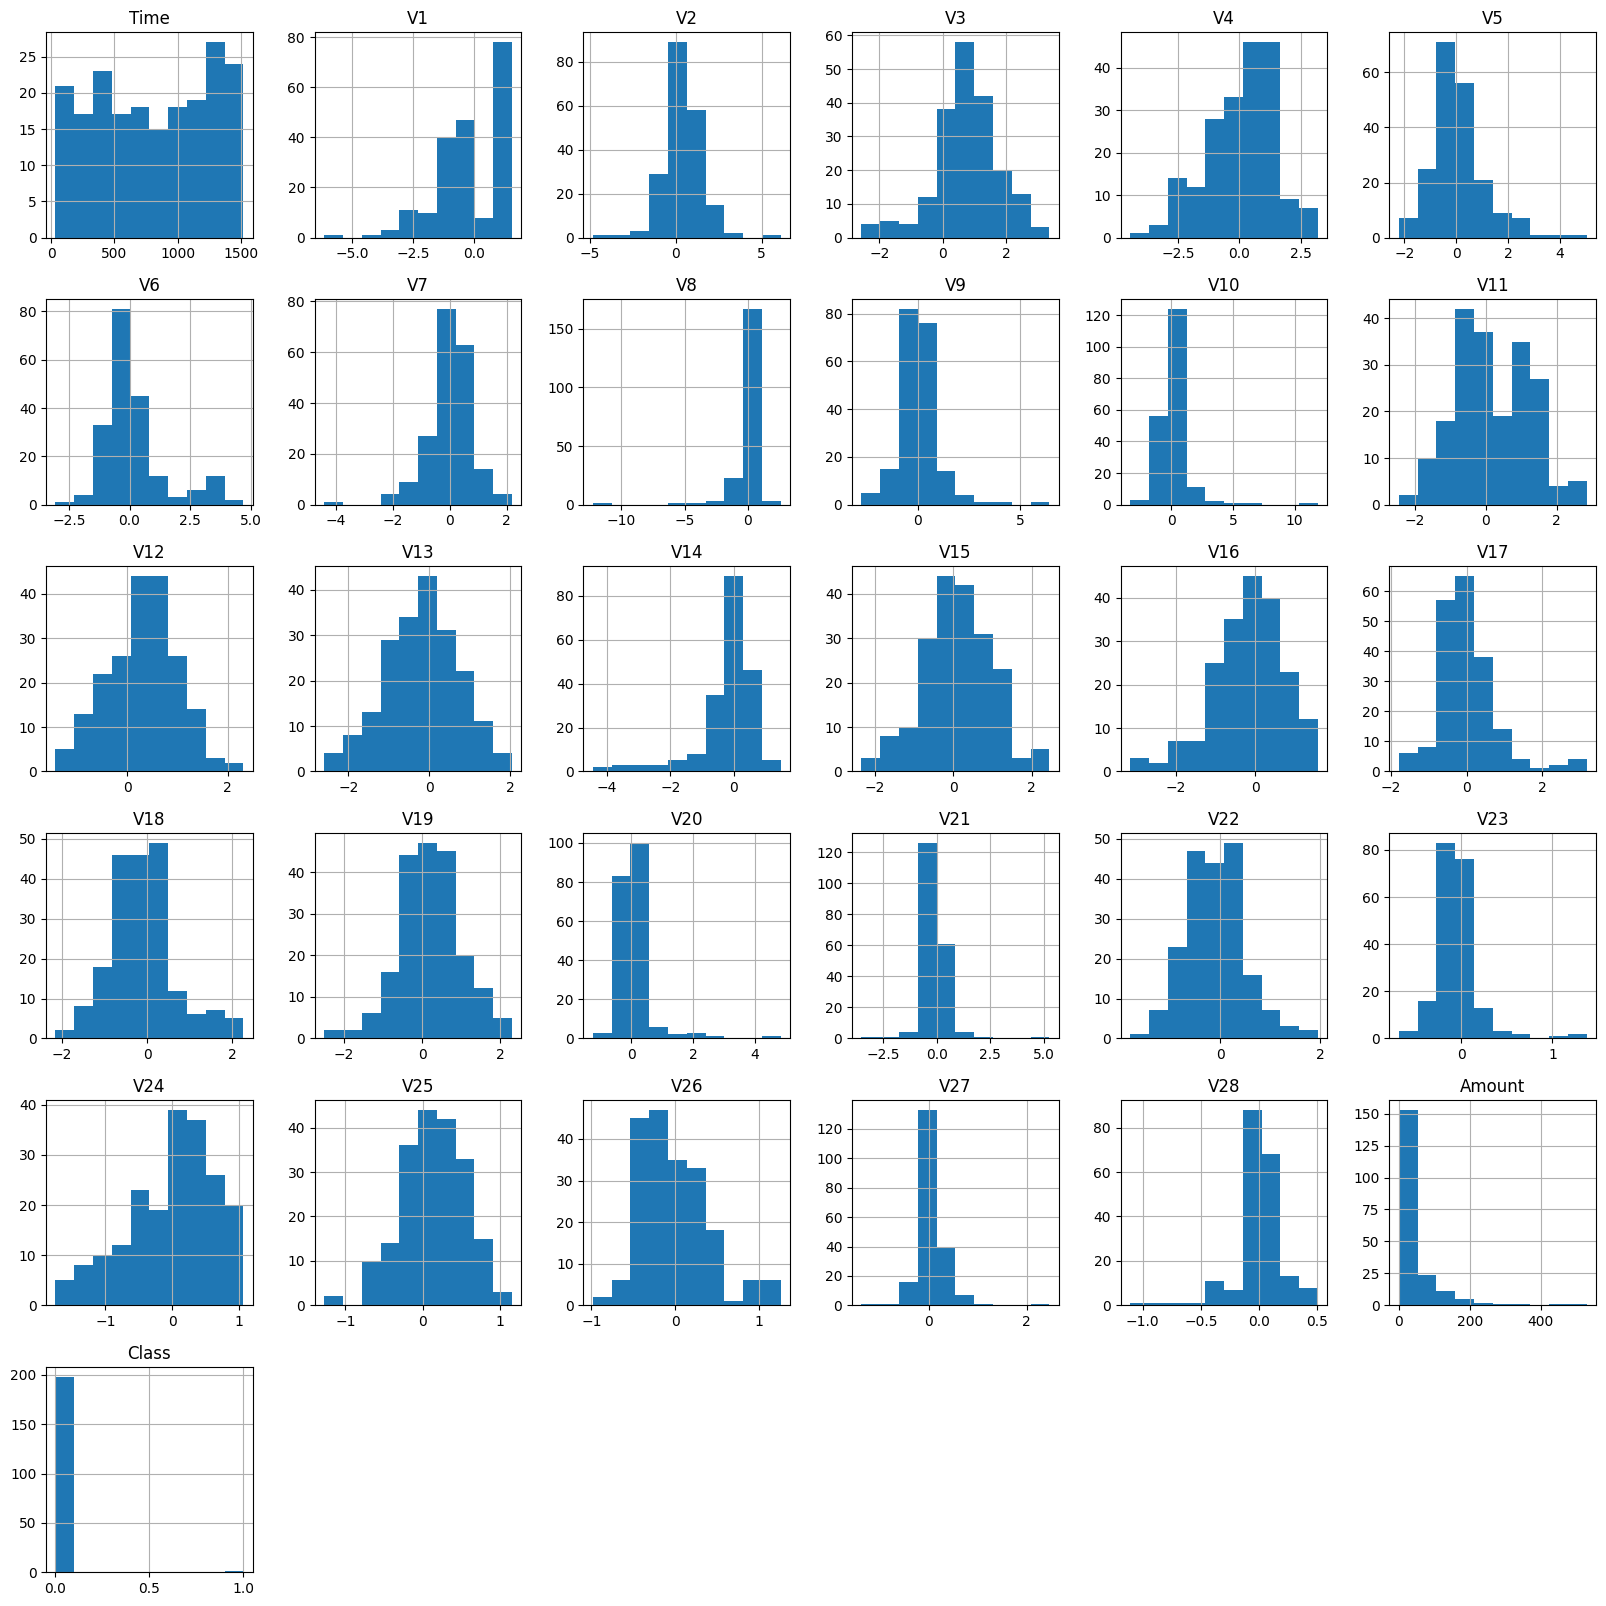

In [ ]:
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.005050505050505051
Fraud Cases: 1
Valid Transactions: 198


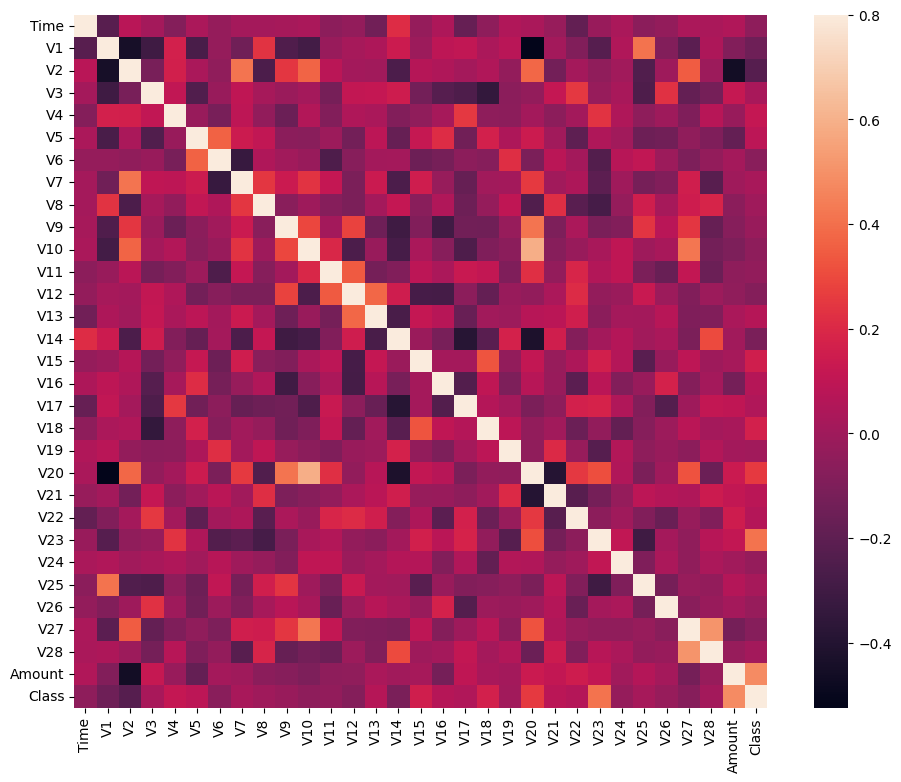

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = data[columns]
Y = data[target]


print(X.shape)
print(Y.shape)

(199, 30)
(199,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


state = 1


classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [ ]:

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)


    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()


    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 5
0.9949799196787149
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       993
         1.0       0.25      0.33      0.29         3

    accuracy                           0.99       996
   macro avg       0.62      0.67      0.64       996
weighted avg       1.00      0.99      1.00       996

Local Outlier Factor: 7
0.9929718875502008
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       993
         1.0       0.00      0.00      0.00         3

    accuracy                           0.99       996
   macro avg       0.50      0.50      0.50       996
weighted avg       0.99      0.99      0.99       996



<Figure size 900x700 with 0 Axes>